In [58]:
#Importación de librearías necesarias
import pandas as pd
from datetime import datetime
import socket
import numpy as np
import math
import time
import pickle  #Para guardar archivos
import os

from pympler import asizeof #Para liberar memoria
import gc

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

semilla = 8

In [5]:
#Path general de archivos
if socket.gethostname()=='LAPTOP-PUSGG08B': #Ip de la laptop
    ruta = "E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/Data/TFM/"
    r_ruta = "E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/RData/TFM/"
elif socket.gethostname()=='PCUIOMTDAIE6382': #Ip del working pc
    ruta =   "D:/Master/Big_Data_Ciencia_Datos/VIU_TFM/Data/TFM/"
    r_ruta = "D:/Master/Big_Data_Ciencia_Datos/VIU_TFM/RData/TFM/"
elif socket.gethostname()=='LPUIODAIE208Y3X': #Ip del working laptop
    ruta =   "C:/Cristian_Guatemal/Personal/Master/Big_Data_Ciencia_Datos/VIU_TFM/Data/TFM/"
    r_ruta = "C:/Cristian_Guatemal/Personal/Master/Big_Data_Ciencia_Datos/VIU_TFM/RData/TFM/"
# Ruta del archivo de pensionistas de vejez
ruta_vj = ruta + 'POB_VEJ_CD656_NEW.dsv'
# Ruta del archivo de historia laboral de pensionistas
ruta_afi = ruta + 'APORTES_CD656_new.dsv'

In [7]:
# Cargar archivo------------------------------------------------------------------------------------------------------------
directorio = r_ruta
nombre_archivo = 'viu_ml_preparacion_data.pkl'
ruta_archivo = os.path.join(directorio, nombre_archivo)
data= pd.read_pickle(ruta_archivo)

In [9]:
data

,SEXO,NUMERO_IMPOSICIONES,BASE_CAL,N_MESES,PRES,LS2,SAL_PROM2,LS_MS,TIEM_T,TIEM_MA,...,N_IND_P,N_VOL_EC_P,N_VOL_EX_P,M_PRI_P,M_PUB_P,M_IND_P,M_VOL_EC_P,M_VOL_EX_P,EDAD_J,TARGET
0,1,288.0,210.635000,297.0,2,382.4950,201.720411,370.00000,85,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,72,0
1,1,514.0,508.824667,523.0,2,1074.1950,499.528730,985.98375,79,60,...,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,64,0
2,0,544.0,566.339833,547.0,2,793.7350,357.121633,884.29750,83,60,...,0.0,0.000000,0.0,0.361702,0.638298,0.0,0.000000,0.0,68,0
3,1,278.0,1285.000000,278.0,2,1950.0000,851.960317,2950.00000,74,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,65,1
4,0,481.0,1325.717667,481.0,2,3056.1000,1065.141687,3341.93000,75,60,...,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442974,1,120.0,399.333333,121.0,2,421.0000,397.121212,409.00000,93,60,...,0.0,0.848485,0.0,0.166667,0.000000,0.0,0.833333,0.0,91,0
442975,0,109.0,424.344000,110.0,1,455.0375,382.017182,423.53125,68,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,67,1
442976,0,68.0,579.554912,69.0,1,904.4500,564.833623,909.81000,78,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,70,0
442977,1,180.0,215.797833,87.0,2,335.0000,196.642184,300.00000,78,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,66,0


In [13]:
#Selección de variables para entrenar los modelos
val_arb = ['BASE_CAL', 'LS2', 'SAL_PROM2', 'LS_MS', 'SUELDO',
           'SEXO', 'PRES', 'N_PRI_P', 'N_PUB_P', 'N_IND_P', 'N_VOL_EC_P',
           'N_VOL_EX_P', 'M_PRI_P', 'M_PUB_P', 'M_IND_P', 'M_VOL_EC_P','M_VOL_EX_P',
           'NUMERO_IMPOSICIONES', 'TIEM_T',
           'TARGET']
data_arb = data[ val_arb ]
data_arb

,BASE_CAL,LS2,SAL_PROM2,LS_MS,SUELDO,SEXO,PRES,N_PRI_P,N_PUB_P,N_IND_P,N_VOL_EC_P,N_VOL_EX_P,M_PRI_P,M_PUB_P,M_IND_P,M_VOL_EC_P,M_VOL_EX_P,NUMERO_IMPOSICIONES,TIEM_T,TARGET
0,210.635000,382.4950,201.720411,370.00000,14725.59,1,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,288.0,85,0
1,508.824667,1074.1950,499.528730,985.98375,31470.31,1,2,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,514.0,79,0
2,566.339833,793.7350,357.121633,884.29750,34997.92,0,2,0.357143,0.642857,0.0,0.000000,0.0,0.361702,0.638298,0.0,0.000000,0.0,544.0,83,0
3,1285.000000,1950.0000,851.960317,2950.00000,107347.00,1,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,278.0,74,1
4,1325.717667,3056.1000,1065.141687,3341.93000,88406.76,0,2,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,481.0,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442974,399.333333,421.0000,397.121212,409.00000,26210.00,1,2,0.151515,0.000000,0.0,0.848485,0.0,0.166667,0.000000,0.0,0.833333,0.0,120.0,93,0
442975,424.344000,455.0375,382.017182,423.53125,42021.89,0,1,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,109.0,68,1
442976,579.554912,904.4500,564.833623,909.81000,38973.52,0,1,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,68.0,78,0
442977,215.797833,335.0000,196.642184,300.00000,17107.87,1,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,180.0,78,0


In [33]:
train, test = train_test_split( data_arb, test_size = 0.2, random_state = semilla )
train.reset_index(drop=True, inplace= True)
test.reset_index(drop=True, inplace= True)

In [35]:
train

,BASE_CAL,LS2,SAL_PROM2,LS_MS,SUELDO,SEXO,PRES,N_PRI_P,N_PUB_P,N_IND_P,N_VOL_EC_P,N_VOL_EX_P,M_PRI_P,M_PUB_P,M_IND_P,M_VOL_EC_P,M_VOL_EX_P,NUMERO_IMPOSICIONES,TIEM_T,TARGET
0,450.145333,578.940,385.783908,450.00000,67126.40,1,2,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,360.0,61,1
1,1545.193333,3221.700,1058.564771,1805.00000,115383.56,1,2,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.0,0.0,414.0,71,0
2,2071.098000,2766.090,1447.054810,3159.72875,303881.51,0,2,0.871429,0.000000,0.000000,0.128571,0.0,1.00000,0.000000,0.000000,0.0,0.0,433.0,61,0
3,525.298833,875.000,386.323246,554.50000,73787.74,0,2,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.0,0.0,407.0,71,0
4,403.133333,545.245,337.471017,409.00000,59732.37,1,2,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,186.0,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354211,445.387333,650.000,284.338207,975.00000,41229.04,0,2,0.200000,0.524138,0.275862,0.000000,0.0,0.47541,0.393443,0.131148,0.0,0.0,422.0,68,1
354212,148.312667,242.135,145.520635,242.13500,9167.80,1,2,0.000000,0.000000,1.000000,0.000000,0.0,0.00000,0.000000,1.000000,0.0,0.0,262.0,81,0
354213,550.860833,883.470,429.636082,600.60000,73467.77,1,2,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,342.0,72,0
354214,375.611667,552.500,312.598658,427.65000,46577.20,0,0,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,307.0,84,1


In [37]:
test

,BASE_CAL,LS2,SAL_PROM2,LS_MS,SUELDO,SEXO,PRES,N_PRI_P,N_PUB_P,N_IND_P,N_VOL_EC_P,N_VOL_EX_P,M_PRI_P,M_PUB_P,M_IND_P,M_VOL_EC_P,M_VOL_EX_P,NUMERO_IMPOSICIONES,TIEM_T,TARGET
0,395.550500,414.000,268.144690,414.00000,30300.35,0,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,189.0,76,1
1,707.392000,1108.330,566.876842,700.00000,118477.26,0,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,443.0,63,1
2,294.541500,634.015,280.728696,598.94875,19370.28,0,2,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,300.0,81,0
3,1412.000000,2861.255,987.774130,1412.00000,181750.44,1,2,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,457.0,66,0
4,2472.000000,5000.700,1666.420637,2472.00000,339949.81,0,2,0.000000,0.990196,0.0,0.009804,0.0,0.000000,1.000000,0.0,0.0,0.0,336.0,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88549,370.974167,488.015,328.602000,445.86500,31217.19,0,2,0.915789,0.084211,0.0,0.000000,0.0,0.875000,0.125000,0.0,0.0,0.0,126.0,77,1
88550,1339.639000,2855.000,866.709699,2317.50000,115272.39,0,2,0.037594,0.962406,0.0,0.000000,0.0,0.083333,0.916667,0.0,0.0,0.0,425.0,67,0
88551,825.662500,826.000,756.968112,797.50000,148365.75,1,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,578.0,75,1
88552,438.682667,675.500,334.648627,615.74000,34134.16,0,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,144.0,79,1


In [39]:
inicio = time.time()
cv = KFold( n_splits = 10, shuffle = True, random_state=semilla) #

total_scores = []
for i in range(2, 100):
   model = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state = semilla)
   fold_accuracy = []
   for train_fold, test_fold in cv.split( train ):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      model.fit( X = f_train.drop(['TARGET'], axis=1), y = f_train['TARGET'])
      y_pred = model.predict(X = f_test.drop(['TARGET'], axis = 1))
      # evaluación del modelo
      acc = accuracy_score(f_test['TARGET'], y_pred)
      fold_accuracy.append(acc)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

max_depth = np.argmax(total_scores) + 2 # +2 porque range(2, 50) y argmax
# devuelve el índice del vector cuyo valor es máximo, y ese vector está indexado comenzando en 0
print ('Max Depth Value ' + str(max(total_scores)) +" (" + str(max_depth) + ")")

plt.plot(range(1,len(total_scores)+1), total_scores,
         marker='o')
plt.ylabel('ACC')

plt.show()

fin = time.time()  
tm= fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y', tm%60,'segundos' )

Max Depth Value 0.7996702488903924 (14)


NameError: name 'plt' is not defined

Max Depth Value 0.7996702488903924 (14)


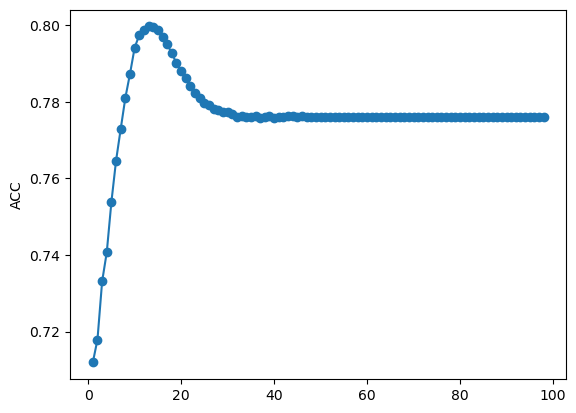

In [42]:
print ('Max Depth Value ' + str(max(total_scores)) +" (" + str(max_depth) + ")")

plt.plot(range(1,len(total_scores)+1), total_scores,
         marker='o')
plt.ylabel('ACC')

plt.show()

In [48]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and pljots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [44]:
# constructor
model = DecisionTreeClassifier( criterion='gini', max_depth = max_depth, random_state = semilla )
model.fit( X = train.drop(['TARGET'], axis=1), y = train['TARGET'])
y_pred = model.predict(X = test.drop(['TARGET'], axis = 1))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     58133
           1       0.72      0.68      0.70     30421

    accuracy                           0.80     88554
   macro avg       0.78      0.77      0.77     88554
weighted avg       0.80      0.80      0.80     88554

Normalized confusion matrix
[[0.86281458 0.13718542]
 [0.32171855 0.67828145]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

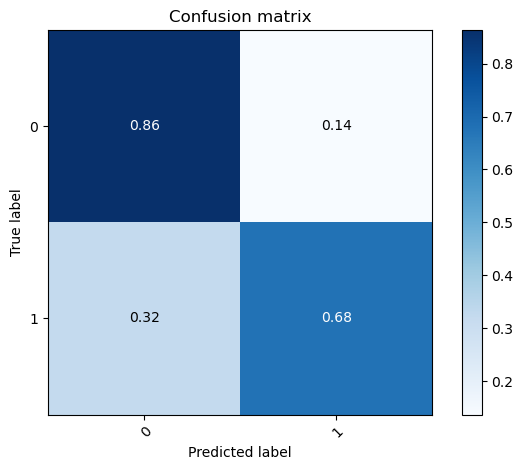

In [54]:
print(classification_report(test['TARGET'], y_pred) )
plot_confusion_matrix(test['TARGET'], y_pred, normalize=True, classes=model.classes_, title='Confusion matrix')

In [60]:
#Balanceando las clases
inicio = time.time()
smote_enn = SMOTEENN( random_state = semilla )
X_train_bal, y_train_bal = smote_enn.fit_resample( train.drop(['TARGET'], axis=1), train['TARGET'] )
fin = time.time()  
tm= fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y', tm%60,'segundos' )

Tiempo de ejecución es: 0.0 horas con 3.0 minutos y 25.622091054916382 segundos


In [61]:
train_bal = pd.concat([ X_train_bal, y_train_bal ], axis=1)

In [ ]:
inicio = time.time()
cv = KFold( n_splits = 10, shuffle = True, random_state=semilla) #

total_scores = []
for i in range(2, 100):
   model = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state = semilla)
   fold_accuracy = []
   for train_fold, test_fold in cv.split( train_bal):
      # División train test aleatoria
      f_train = train_bal.loc[train_fold]
      f_test = train_bal.loc[test_fold]
      # entrenamiento y ejecución del modelo
      model.fit( X = f_train.drop(['TARGET'], axis=1), y = f_train['TARGET'])
      y_pred = model.predict(X = f_test.drop(['TARGET'], axis = 1))
      # evaluación del modelo
      acc = accuracy_score(f_test['TARGET'], y_pred)
      fold_accuracy.append(acc)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

max_depth = np.argmax(total_scores) + 2 # +2 porque range(2, 50) y argmax
# devuelve el índice del vector cuyo valor es máximo, y ese vector está indexado comenzando en 0
print ('Max Depth Value ' + str(max(total_scores)) +" (" + str(max_depth) + ")")

plt.plot(range(1,len(total_scores)+1), total_scores,
         marker='o')
plt.ylabel('ACC')

plt.show()

fin = time.time()  
tm= fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y', tm%60,'segundos' )

## Conjunto de modelos

In [ ]:
regressor = RandomForestClassifier( random_state = semilla, n_jobs = -1 )
regressor

In [ ]:
#RandomizedSearch
param_dist = { "criterion": ['gini', 'entropy', 'log_loss'],
               "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree,
               "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
               "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
               "max_features": ['sqrt', 'log2', None], # Number of features to consider at every split (1.0 is the old 'auto')
               "bootstrap": [True, False], # Method of selecting samples for training each tree
               "class_weight":['balanced', 'balanced_subsample']
             }

In [ ]:
rnd_regres = RandomizedSearchCV( estimator = regressor, param_distributions = param_dist,
                                 n_iter = 100, cv = 5, random_state = semilla, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train.drop(['TARGET'], axis=1), y = train['TARGET'])

In [ ]:
rnd_regres.best_params_